# Manipulating coordinate values

In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

from ktch.datasets import load_outline_mosquito_wings

In [2]:
data_outline_mosquito_wings = load_outline_mosquito_wings(as_frame=True)
coords = data_outline_mosquito_wings.coords.to_numpy().reshape(-1,100,2)

## Translation

You can translate the coordinate values of outline data using list comprehension.

In [91]:
rng = np.random.default_rng()
dx = rng.normal(0, 1, size=coords.shape[0::2])
coords_translated = [coords[i] + dx[i] for i in range(len(coords))]

displacement:  [-0.41684554 -0.28545981]


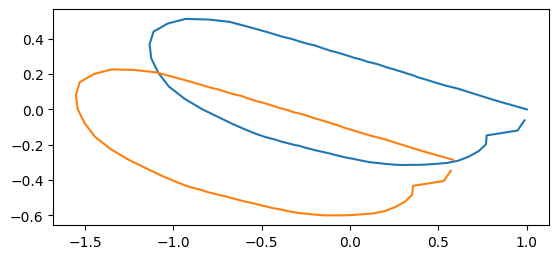

In [92]:
idx = 0

fig, ax = plt.subplots()
sns.lineplot(x=coords[idx][:,0], y=coords[idx][:,1], sort= False,estimator=None,ax=ax)
sns.lineplot(x=coords_translated[idx][:,0], y=coords_translated[idx][:,1], sort= False,estimator=None,ax=ax)
ax.set_aspect('equal')
print("displacement: ", dx[idx])

If the coordinate values are stored as `np.ndarray`, 
you can simply add the displacement vectors after `reshape(n_spesimens, 1, n_dim)`.

displacement:  [-0.41684554 -0.28545981]


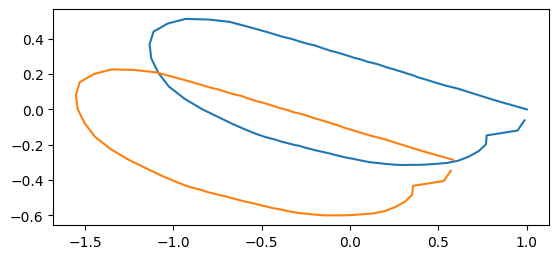

In [93]:
coords_translated_array = coords + dx.reshape(dx.shape[0], 1, dx.shape[1])

idx = 0

fig, ax = plt.subplots()
sns.lineplot(x=coords[idx][:,0], y=coords[idx][:,1], sort= False,estimator=None,ax=ax)
sns.lineplot(x=coords_translated_array[idx][:,0], y=coords_translated_array[idx][:,1], sort= False,estimator=None,ax=ax)
ax.set_aspect('equal')
print("displacement: ", dx[idx])

## Scaling

In [94]:
s = rng.uniform(0.5,1.5, size=coords.shape[0])
coords_scaled = [s[i]*coords[i] for i in range(len(coords))]

scale:  0.870705218191922


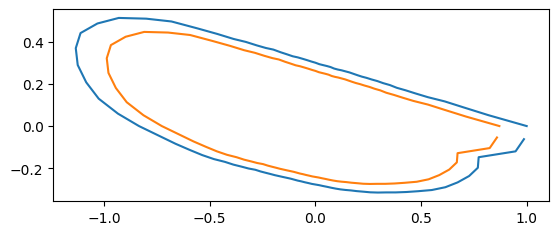

In [95]:
idx = 0

fig, ax = plt.subplots()
sns.lineplot(x=coords[idx][:,0], y=coords[idx][:,1], sort= False,estimator=None,ax=ax)
sns.lineplot(x=coords_scaled[idx][:,0], y=coords_scaled[idx][:,1], sort= False,estimator=None,ax=ax)
ax.set_aspect('equal')
print("scale: ", s[idx])

If the coordinate values are stored as `np.ndarray`, 
you can simply add the displacement vectors after `reshape(n_spesimens, 1, 1)`.

scale:  0.870705218191922


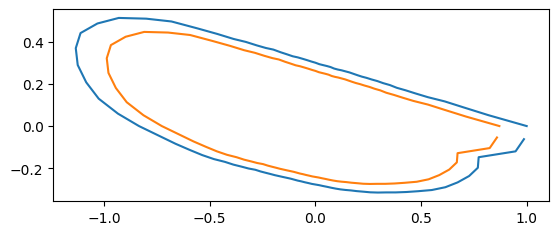

In [96]:
coords_scaled_arr = s.reshape(s.shape[0], 1, 1)*coords

idx = 0

fig, ax = plt.subplots()
sns.lineplot(x=coords[idx][:,0], y=coords[idx][:,1], sort= False,estimator=None,ax=ax)
sns.lineplot(x=coords_scaled_arr[idx][:,0], y=coords_scaled_arr[idx][:,1], sort= False,estimator=None,ax=ax)
ax.set_aspect('equal')
print("scale: ", s[idx])

## Rotation
We provide `rotation_matrix_2d` helper function to generate the rotation matrix.

Alternatively, you can use `scipy.spatial.transform.Rotation` or define by yourself.


In [11]:
from ktch.outline import rotation_matrix_2d
from scipy.spatial.transform import Rotation as R

In [18]:
theta = np.pi/4
print(rotation_matrix_2d(theta))
print(R.from_rotvec(theta*np.array([0,0,1])).as_matrix()[0:2,0:2])
print(np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]]))

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [97]:
theta = rng.uniform(0, 2*np.pi, size=coords.shape[0])
coords_rotated = [(rotation_matrix_2d(theta[i]) @ coords[i].T).T for i in range(len(coords))]

theta:  4.586852283511729


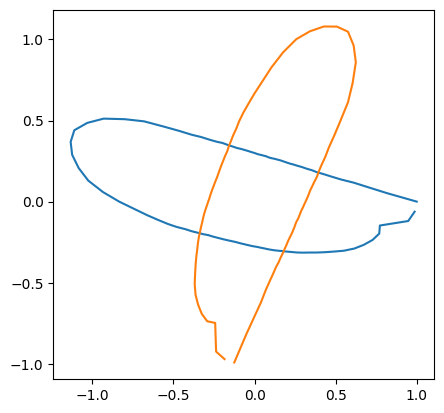

In [99]:
idx = 0

fig, ax = plt.subplots()
sns.lineplot(x=coords[idx][:,0], y=coords[idx][:,1], sort= False,estimator=None,ax=ax)
sns.lineplot(x=coords_rotated[idx][:,0], y=coords_rotated[idx][:,1], sort= False,estimator=None,ax=ax)
ax.set_aspect('equal')
print("theta: ", theta[idx])

When the coordinate values are stored as `np.ndarray`, 
the rotated array is calculated by applying the `matmul (@)` operator on the array of rotation matrixes transposed to `n_samples x n_dim x n_dim` and the array of the coordinate values transposed to `n_samples x n_dim x n_coordinates`.


scale:  0.870705218191922


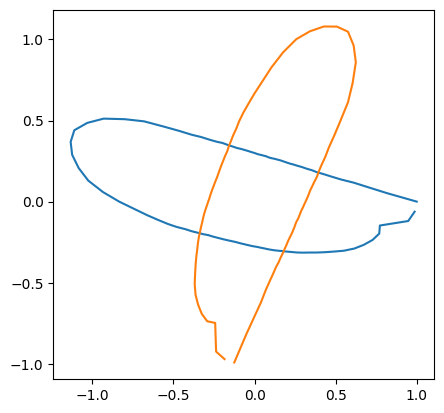

In [100]:
coords_rotated_arr = (rotation_matrix_2d(theta).transpose(2, 0, 1) @ coords.transpose(0, 2, 1)).transpose(0, 2, 1)

idx = 0

fig, ax = plt.subplots()
sns.lineplot(x=coords[idx][:,0], y=coords[idx][:,1], sort= False,estimator=None,ax=ax)
sns.lineplot(x=coords_rotated_arr[idx][:,0], y=coords_rotated_arr[idx][:,1], sort= False,estimator=None,ax=ax)
ax.set_aspect('equal')
print("scale: ", s[idx])

## Changing the starting point
The starting point (arclength parameter $t = 0$) is often adjusted for aligning the outlines.

You can use the `numpy.roll` function for the purpose.

In [149]:
new_staring_points = np.array([rng.integers(0,len(coord)) for coord in coords], dtype=int)
coords_changed_start = [np.roll(coords[i], -new_staring_points[i], axis=0) for i in range(len(coords))]

starting point:  95


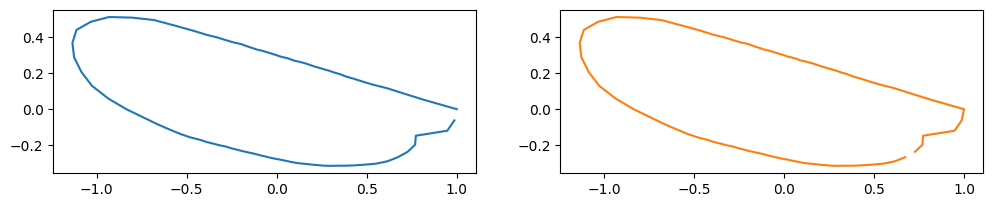

In [150]:
idx = 0

fig, ax = plt.subplots(1,2, figsize=(12,7))
sns.lineplot(x=coords[idx][:,0], y=coords[idx][:,1], sort= False,estimator=None,ax=ax[0])
sns.lineplot(x=coords_changed_start[idx][:,0], y=coords_changed_start[idx][:,1], 
             sort= False,color="C1",estimator=None,ax=ax[1])
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
print("starting point: ", new_staring_points[idx])